In [102]:
# import sklearn.datasets
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Sort function
take = lambda n, iterable: list(itertools.islice(iterable, n)) 
ascending = lambda array: dict(reversed(sorted(array.items(), key=lambda item: item[1])))

class Analyzer:
    def __init__(self, sourcePath):
        self.data = pd.read_csv(sourcePath)
        self.indexes = self.data['index']
        self.labels = self.data['label']
        self.texts = self.data['text']

    def processData(self):
        
        # Create the slots for labels and grams
        self.words = {}
        # Label 0,1
        for i in range(3):
            # 1,2,3 - Grams
            self.words[i] = {}
            
            for j in range(3):
                self.words[i][j] = {}

        # print(self.texts)
        for i,text in enumerate(self.texts):
            # if i > 5:
            #     break
            # print(i,text)
            prev, prevPrev, current = "", "", ""
            for j, word in enumerate(text.split(" ")):
                prevPrev = prev
                prev = current
                current = word
                
                # 1-Gram
                if current not in self.words[self.labels[i]][0]:
                    self.words[self.labels[i] ][0][current] = 1
                else:
                    self.words[self.labels[i] ][0][current] = self.words[self.labels[i] ][0].get(current) + 1

                # Labels together
                if current not in self.words[2][0]:
                    self.words[2][0][current] = 1
                else:
                    self.words[2][0][current] = self.words[2][0].get(current) + 1

                # 2-Gram
                if j > 0:
                    act2 = prev + ' ' + current
                    # print('act2', act2)
                    if act2 not in self.words[self.labels[i]][1]:
                        self.words[self.labels[i] ][1][act2] = 1
                    else:
                        self.words[self.labels[i] ][1][act2] = self.words[self.labels[i] ][1].get(act2) + 1

                    # Labels together
                    if act2 not in self.words[2][1]:
                        self.words[2][1][act2] = 1
                    else:
                        self.words[2][1][act2] = self.words[2][1].get(act2) + 1

                # 3-Gram
                if j > 1:
                    act3 = prevPrev + ' ' + prev + ' ' + current
                    # print('act3', act3)
                    if act3 not in self.words[self.labels[i]][2]:
                        self.words[self.labels[i] ][2][act3] = 1
                    else:
                        self.words[self.labels[i] ][2][act3] = self.words[self.labels[i] ][2].get(act3) + 1
                    
                    # Labels together
                    if act3 not in self.words[2][2]:
                        self.words[2][2][act3] = 1
                    else:
                        self.words[2][2][act3] = self.words[2][2].get(act3) + 1
        print("process finished")
        # print(self.words[0][1])

    def sortData(self):
        self.sortedAscending = {}
        # Label 0,1
        for i in range(3):
            # 1,2,3 - Grams

            self.sortedAscending[i] = {}
            for j in range(3):
                # Sort all the words
                self.sortedAscending[i][j] = ascending( self.words[i][j] )
        print("data sorted")

    # Check the correctness by the first element's number
    # in each subset (labeled with 1 and 0) and the whole.
    def checkCounting(self):
        # Check the first X item
        checkedItems = 5
        passed = True

        for i in range(checkedItems):
            if not passed:
                break

            # Grams
            for j in range(3):
                # Get the most frequent word of all in J - Gram
                word = list(self.sortedAscending[2][j].items())[i][0]

                # Counters
                total = list(self.sortedAscending[2][j].items())[i][1]
                label1 = self.sortedAscending[0][j].get(word)
                label2 = self.sortedAscending[1][j].get(word)
                if label1 + label2 != total:
                    print('Checker failed: with the word ' + word)
                    print(label1 + label2, '!=', total, ' difference:', abs( total - label1 - label2))
                    print('The whole counter is not equal to the addition of label 0 and 1\'s counter.')
                    passed = False
                    break
                    
        if passed:
            print('Checking passed!')

    def lengthAnalysis(self):
        # Is there a collaration between the avarage length and label?
        self.lengths = { 0: {}, 1: {} }
        summ = [0,0]
        count = [0,0]
        for i, text in self.texts.items():
            # Simple avarage length
            la = self.labels[i]
            summ[la] += len(text)
            count[la] += 1
            # Number of texts by length
            if round(len(text),-1) in self.lengths[la]:
                self.lengths[la][round(len(text),-1)] += 1
            else:
                self.lengths[la][round(len(text),-1)] = 1

        plt.plot( self.lengths[1].keys(), self.lengths[1].values(), 'ro', markersize=2)
        plt.plot( self.lengths[0].keys(), self.lengths[0].values(), 'bo', markersize=2)
        plt.xlabel('length of reviews')
        plt.ylabel('number of reviews')
        print('Label 0 - Number of reviews:', count[0], '; The avarage length:', round(summ[0]/count[0], 2) )
        print('Label 1 - Number of reviews:', count[1], '; The avarage length:', round(summ[1]/count[1], 2) )
        print()
        print('Label 1 - red; Label 0 - blue')
        plt.show()

    def lengthCorrelation(self):
        lengths = [(lambda x: len(x[1]))(x) for x in self.texts.items()]
        lenLab = pd.DataFrame( list(zip(lengths, self.labels)), columns=["length","labels"])
        print(lenLab.corr())

    def printFrequent(self,n):
        # The first 5 most frequent elements
        for j in range(3):
            for i in range(3):
                if i == 2:
                    # Together the labels
                    print('Counting the whole G-' + str(j+1))
                else:
                    # i - Labels, j - Grams
                    print('L-' + str(i) + ' G-' + str(j+1) + ' (in ascending order): ')

                words = ''
                scores = ''
                for k,word in enumerate(take(n, train.sortedAscending[i][j].items())):
                    if k == 0:
                        words += '\'' + word[0] + '\''
                        scores += str(word[1])
                    else: 
                        words += ', \'' + word[0] + '\''
                        scores += ', ' + str(word[1])
                print('words:', words)
                print('scores:', scores)
                print()
            print()

In [103]:
train = Analyzer("stsa.binary.phrases.train")
train.processData()
train.sortData()
train.checkCounting()

process finished
data sorted
Checking passed!


Label 0 - Number of reviews: 34702 ; The avarage length: 53.96
Label 1 - Number of reviews: 42259 ; The avarage length: 50.72

Label 1 - red; Label 0 - blue


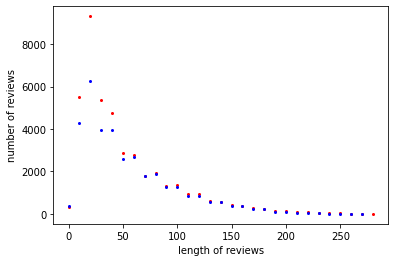

In [104]:
train.lengthAnalysis()

In [105]:
train.lengthCorrelation()

          length    labels
length  1.000000 -0.037769
labels -0.037769  1.000000


In [106]:
train.printFrequent(5)

L-0 G-1 (in ascending order): 
words: 'the', ',', 'a', 'of', 'and'
scores: 14357, 12716, 10715, 8955, 8783

L-1 G-1 (in ascending order): 
words: 'the', ',', 'a', 'and', 'of'
scores: 16665, 16380, 13727, 13154, 11423

Counting the whole G-1
words: 'the', ',', 'a', 'and', 'of'
scores: 31022, 29096, 24442, 21937, 20378


L-0 G-2 (in ascending order): 
words: 'of the', ', and', 'in the', 'it 's', ', but'
scores: 1564, 1070, 946, 931, 818

L-1 G-2 (in ascending order): 
words: 'of the', ', and', 'in the', 'it 's', 'is a'
scores: 2232, 1565, 1052, 981, 967

Counting the whole G-2
words: 'of the', ', and', 'in the', 'it 's', ', but'
scores: 3796, 2635, 1998, 1912, 1744


L-0 G-3 (in ascending order): 
words: 'the film 's', 'the movie is', 'it 's a', ', it 's', 'one of the'
scores: 199, 125, 124, 114, 113

L-1 G-3 (in ascending order): 
words: 'one of the', 'it 's a', ', but it', 'the film 's', ', and the'
scores: 361, 180, 168, 154, 139

Counting the whole G-3
words: 'one of the', 'the film 

In [107]:
#########
## DEV ##
#########
dev = Analyzer("stsa.binary.dev")
dev.processData()
dev.sortData()
dev.checkCounting()

process finished
data sorted
Checking passed!


Label 0 - Number of reviews: 428 ; The avarage length: 101.96
Label 1 - Number of reviews: 444 ; The avarage length: 108.43

Label 1 - red; Label 0 - blue


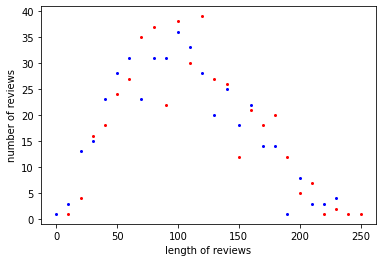

In [108]:
dev.lengthAnalysis()

In [109]:
dev.lengthCorrelation()

          length    labels
length  1.000000  0.066778
labels  0.066778  1.000000


In [110]:
dev.printFrequent(5)

L-0 G-1 (in ascending order): 
words: 'the', ',', 'a', 'of', 'and'
scores: 14357, 12716, 10715, 8955, 8783

L-1 G-1 (in ascending order): 
words: 'the', ',', 'a', 'and', 'of'
scores: 16665, 16380, 13727, 13154, 11423

Counting the whole G-1
words: 'the', ',', 'a', 'and', 'of'
scores: 31022, 29096, 24442, 21937, 20378


L-0 G-2 (in ascending order): 
words: 'of the', ', and', 'in the', 'it 's', ', but'
scores: 1564, 1070, 946, 931, 818

L-1 G-2 (in ascending order): 
words: 'of the', ', and', 'in the', 'it 's', 'is a'
scores: 2232, 1565, 1052, 981, 967

Counting the whole G-2
words: 'of the', ', and', 'in the', 'it 's', ', but'
scores: 3796, 2635, 1998, 1912, 1744


L-0 G-3 (in ascending order): 
words: 'the film 's', 'the movie is', 'it 's a', ', it 's', 'one of the'
scores: 199, 125, 124, 114, 113

L-1 G-3 (in ascending order): 
words: 'one of the', 'it 's a', ', but it', 'the film 's', ', and the'
scores: 361, 180, 168, 154, 139

Counting the whole G-3
words: 'one of the', 'the film 

In [111]:
##########
## TEST ##
##########
test = Analyzer("stsa.binary.test")
test.processData()
test.sortData()
test.checkCounting()

process finished
data sorted
Checking passed!


In [112]:
test.lengthCorrelation()

          length    labels
length  1.000000  0.046852
labels  0.046852  1.000000


Label 0 - Number of reviews: 912 ; The avarage length: 101.0
Label 1 - Number of reviews: 909 ; The avarage length: 105.59

Label 1 - red; Label 0 - blue


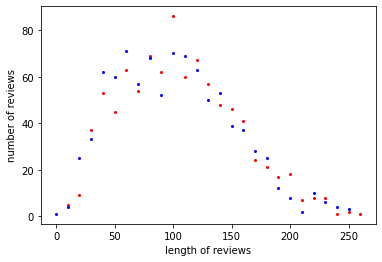

In [113]:
test.lengthAnalysis()

In [114]:
test.printFrequent(5)

L-0 G-1 (in ascending order): 
words: 'the', ',', 'a', 'of', 'and'
scores: 14357, 12716, 10715, 8955, 8783

L-1 G-1 (in ascending order): 
words: 'the', ',', 'a', 'and', 'of'
scores: 16665, 16380, 13727, 13154, 11423

Counting the whole G-1
words: 'the', ',', 'a', 'and', 'of'
scores: 31022, 29096, 24442, 21937, 20378


L-0 G-2 (in ascending order): 
words: 'of the', ', and', 'in the', 'it 's', ', but'
scores: 1564, 1070, 946, 931, 818

L-1 G-2 (in ascending order): 
words: 'of the', ', and', 'in the', 'it 's', 'is a'
scores: 2232, 1565, 1052, 981, 967

Counting the whole G-2
words: 'of the', ', and', 'in the', 'it 's', ', but'
scores: 3796, 2635, 1998, 1912, 1744


L-0 G-3 (in ascending order): 
words: 'the film 's', 'the movie is', 'it 's a', ', it 's', 'one of the'
scores: 199, 125, 124, 114, 113

L-1 G-3 (in ascending order): 
words: 'one of the', 'it 's a', ', but it', 'the film 's', ', and the'
scores: 361, 180, 168, 154, 139

Counting the whole G-3
words: 'one of the', 'the film 

In [115]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

class ExtendedSentAnal(Analyzer):
    cv = CountVectorizer()
    vectorizer = TfidfVectorizer()
    tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True) 

    def __init__(self, sourcePath):
        Analyzer.__init__(self, sourcePath)
    
    def tfIdfWithCV(self):
        word_count_vector = cv.fit_transform(self.texts)
        print(word_count_vector)
        # sort ascending 
        # df_idf = pd.DataFrame(word_count_vector.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
    
    def tfIdfWithTranformer(self):
        tfidf_transformer.fit(word_count_vector)
        # print(word_count_vector)
        df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
        # sort ascending 
        print(tfidf_transformer.idf_)
        # print(df_idf.sort_values(by=['idf_weights']))


train = ExtendedSentAnal("stsa.binary.phrases.train")
#instantiate CountVectorizer() 
train.tfIdfWithTranformer()

[ 9.76616042  7.54153687  8.61348091 ... 10.86477271 10.4593076
 10.4593076 ]


In [1]:
# count matrix 
count_vector=cv.transform(train.texts) 
 
# tf-idf scores
tf_idf_vector = tfidf_transformer.transform(count_vector)

NameError: name 'cv' is not defined

In [117]:
feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0]
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

tfidf
dredge      0.433279
nerds       0.400452
revenge     0.366934
clichés     0.332826
filmmakers  0.313861
...              ...
fidgeted    0.000000
field       0.000000
fields      0.000000
fiend       0.000000
élan        0.000000

[15093 rows x 1 columns]